## Import our libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## load our dataset:

In [5]:
df = pd.read_csv("teams.csv")

In [6]:
df

team      country  year  events  athletes   age  height  weight  medals  \
0     AFG  Afghanistan  1964       8         8  22.0   161.0    64.2       0   
1     AFG  Afghanistan  1968       5         5  23.2   170.2    70.0       0   
2     AFG  Afghanistan  1972       8         8  29.0   168.3    63.8       0   
3     AFG  Afghanistan  1980      11        11  23.6   168.4    63.2       0   
4     AFG  Afghanistan  2004       5         5  18.6   170.8    64.8       0   
...   ...          ...   ...     ...       ...   ...     ...     ...     ...   
2139  ZIM     Zimbabwe  2000      19        26  25.0   179.0    71.1       0   
2140  ZIM     Zimbabwe  2004      11        14  25.1   177.8    70.5       3   
2141  ZIM     Zimbabwe  2008      15        16  26.1   171.9    63.7       4   
2142  ZIM     Zimbabwe  2012       8         9  27.3   174.4    65.2       0   
2143  ZIM     Zimbabwe  2016      13        31  27.5   167.8    62.2       0   

      prev_medals  prev_3_medals  
0             0.0            0.0  
1             0.0            0.0  
2             0.0            0.0  
3             0.0            0.0  
4             0.0            0.0  
...           ...            ...  
2139          0.0            0.0  
2140          0.0            0.0  
2141          3.0            1.0  
2142          4.0            2.3  
2143          0.0            2.3  

[2144 rows x 11 columns]

In [7]:
df.describe()

year       events     athletes          age       height  \
count  2144.000000  2144.000000  2144.000000  2144.000000  2144.000000   
mean   1994.507463    35.724813    73.693097    24.778591   173.900233   
std      15.384205    49.490270   127.907577     2.808559     5.357367   
min    1964.000000     1.000000     1.000000    17.000000   151.000000   
25%    1984.000000     6.000000     7.000000    23.275000   170.500000   
50%    1996.000000    13.000000    19.000000    24.700000   174.400000   
75%    2008.000000    44.000000    70.250000    26.100000   177.300000   
max    2016.000000   270.000000   839.000000    66.000000   193.000000   

            weight       medals  prev_medals  prev_3_medals  
count  2144.000000  2144.000000  2014.000000    2014.000000  
mean     69.271595    10.556437    10.248759       9.449901  
std       7.606507    33.028143    31.951920      28.232227  
min      43.000000     0.000000     0.000000       0.000000  
25%      64.500000     0.000000     0.000000       0.000000  
50%      69.400000     0.000000     0.000000       0.300000  
75%      73.400000     4.000000     4.000000       4.650000  
max     148.000000   442.000000   442.000000     314.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


so let's select the features we want to work with

In [9]:
df = df[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [10]:
df

team      country  year  athletes   age  prev_medals  medals
0     AFG  Afghanistan  1964         8  22.0          0.0       0
1     AFG  Afghanistan  1968         5  23.2          0.0       0
2     AFG  Afghanistan  1972         8  29.0          0.0       0
3     AFG  Afghanistan  1980        11  23.6          0.0       0
4     AFG  Afghanistan  2004         5  18.6          0.0       0
...   ...          ...   ...       ...   ...          ...     ...
2139  ZIM     Zimbabwe  2000        26  25.0          0.0       0
2140  ZIM     Zimbabwe  2004        14  25.1          0.0       3
2141  ZIM     Zimbabwe  2008        16  26.1          3.0       4
2142  ZIM     Zimbabwe  2012         9  27.3          4.0       0
2143  ZIM     Zimbabwe  2016        31  27.5          0.0       0

[2144 rows x 7 columns]

### EDA

Let's explore our data to see if there's a correlation

D:\programs\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\programs\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\programs\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\programs\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

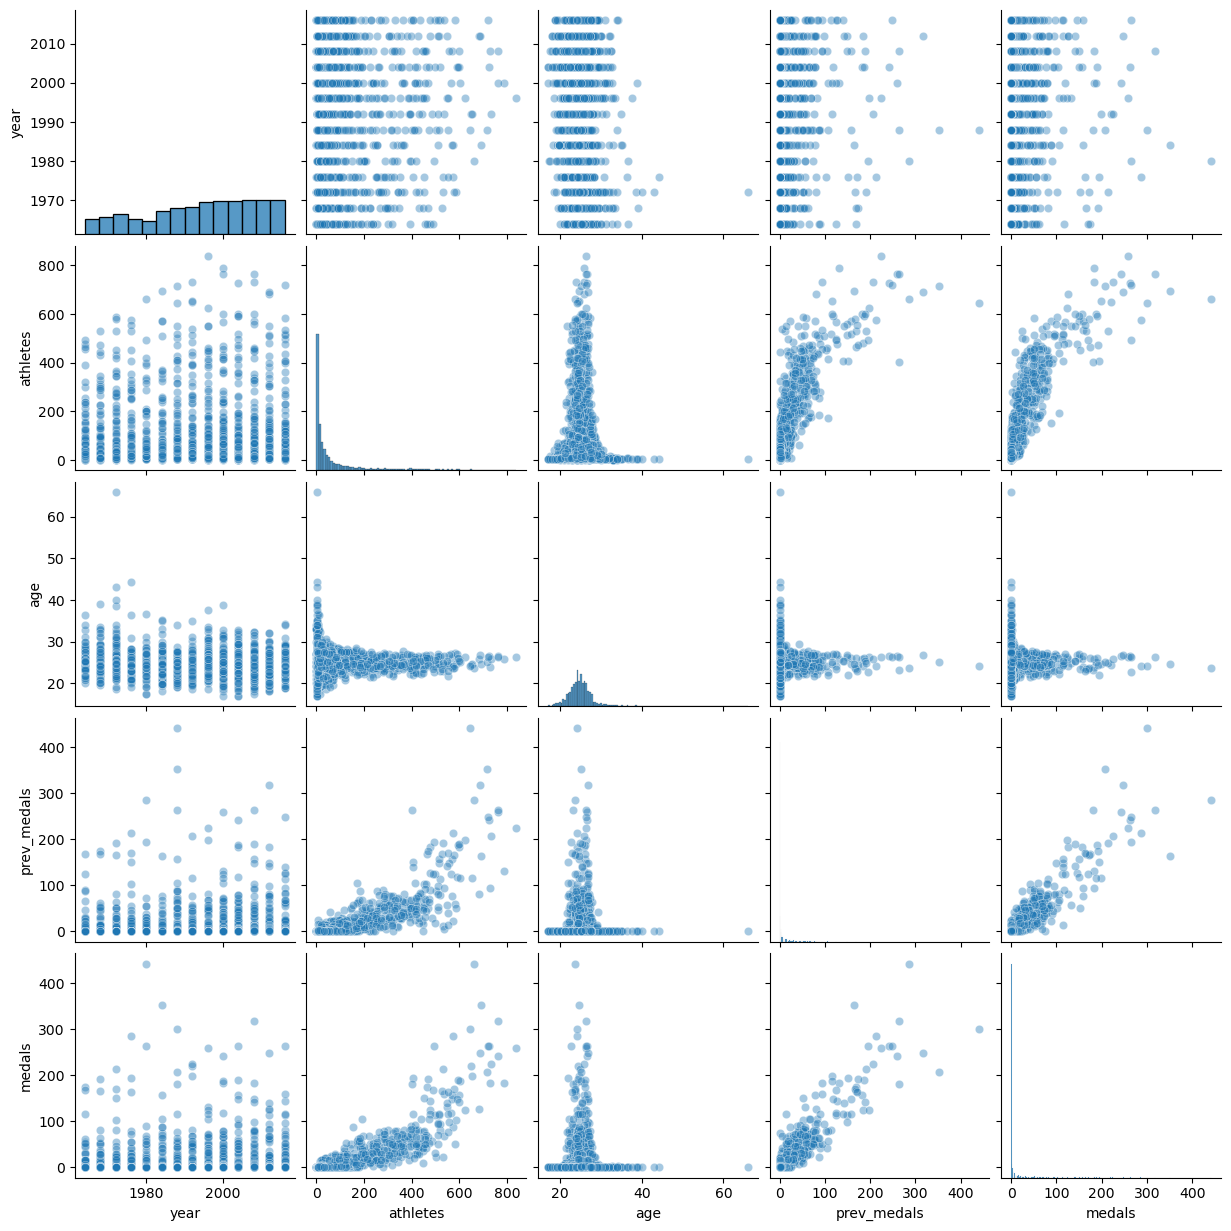

In [11]:
sns.pairplot(df, kind = 'scatter', plot_kws={'alpha': 0.4})

graphically, we can see that there's somewhat of a linear correlation between the number of athletes, with previous medal won by the country with medals. there's some sort of nonlinear relationship between the age of the athletes and the medals won 

In [12]:
df.select_dtypes(include=['number']).corr()["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

This also shows us the correlation as well

looking at the correlation one after the other:

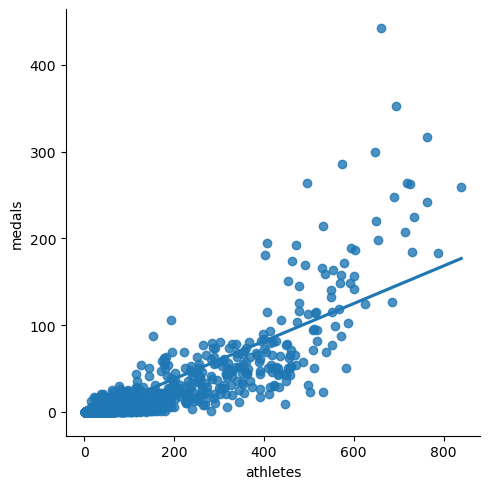

In [13]:
sns.lmplot(x = "athletes", y = "medals", data = df, fit_reg = True, ci = None)

There's a rough correlation here between the number of atheletes. Intuitively, this make sense because the more atheletes you have in a team, the more chances of winning more medals

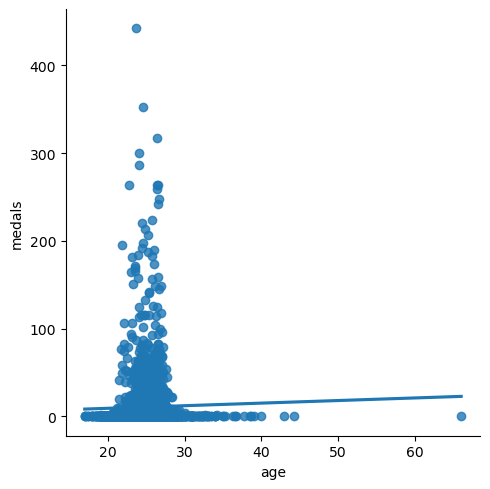

In [14]:
sns.lmplot(x = "age", y = "medals", data = df, fit_reg = True, ci = None)

There's a non-linear relationship between the age of the athletes and the number of medal. The plot shows that atheletes withing the ages of 20 and 30 are more likely to win a medal

<Axes: ylabel='Frequency'>

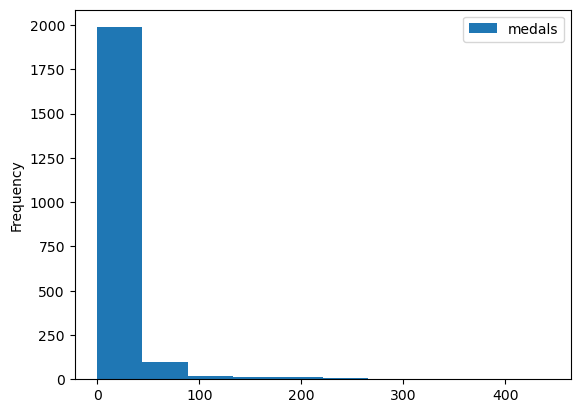

In [15]:
df.plot.hist(y = "medals")

From this histogram, we can see that a lot of countries have won between 0 - 50 medals, then fewer countries have won most of the medals. This imbalance might affect the accuracy and usefulness of our model. 

## Data Cleaning

let's look for rows that have missing values

In [16]:
df[df.isnull().any(axis=1)]

team                           country  year  athletes   age  \
19    ALB                           Albania  1992         9  25.3   
26    ALG                           Algeria  1964         7  26.0   
39    AND                           Andorra  1976         3  28.3   
50    ANG                            Angola  1980        17  17.4   
59    ANT               Antigua and Barbuda  1976        17  23.2   
...   ...                               ...   ...       ...   ...   
2092  VIN  Saint Vincent and the Grenadines  1988         6  20.5   
2103  YAR                       North Yemen  1984         3  27.7   
2105  YEM                             Yemen  1992         8  19.6   
2112  YMD                       South Yemen  1988         5  23.6   
2120  ZAM                            Zambia  1964        15  21.7   

      prev_medals  medals  
19            NaN       0  
26            NaN       0  
39            NaN       0  
50            NaN       0  
59            NaN       0  
...           ...     ...  
2092          NaN       0  
2103          NaN       0  
2105          NaN       0  
2112          NaN       0  
2120          NaN       0  

[130 rows x 7 columns]

we have about 130 rows that have missing values. This could be as a result of some team not participating in the previous olympics. So we are just going to drop those rows with missing values

In [17]:
df = df.dropna()

In [18]:
df

team      country  year  athletes   age  prev_medals  medals
0     AFG  Afghanistan  1964         8  22.0          0.0       0
1     AFG  Afghanistan  1968         5  23.2          0.0       0
2     AFG  Afghanistan  1972         8  29.0          0.0       0
3     AFG  Afghanistan  1980        11  23.6          0.0       0
4     AFG  Afghanistan  2004         5  18.6          0.0       0
...   ...          ...   ...       ...   ...          ...     ...
2139  ZIM     Zimbabwe  2000        26  25.0          0.0       0
2140  ZIM     Zimbabwe  2004        14  25.1          0.0       3
2141  ZIM     Zimbabwe  2008        16  26.1          3.0       4
2142  ZIM     Zimbabwe  2012         9  27.3          4.0       0
2143  ZIM     Zimbabwe  2016        31  27.5          0.0       0

[2014 rows x 7 columns]

so we have 2014 rows now.

## Data Splitting

so since our data is a time series data, we want to split our data in a way that respect that. we will take the last two years, that is the 2012 and the 2016, and put them in our test set. We'll then take the previous years and put them in our training set. We are doing this because we are trying to respect the order, and not to use future data to predict the past.

In [19]:
train = df[df["year"] < 2012].copy()
test = df[df["year"] >= 2012].copy()

In [20]:
train.shape

(1609, 7)

In [21]:
test.shape

(405, 7)

## Training our model

In [22]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

so recall the features that linearly correlated with our targets: athletes and prev_medals. Those features will be our predictors.

In [23]:
predictors = ["athletes", "prev_medals"]
target = ["medals"]

In [24]:
lm.fit(train[predictors], train["medals"])

LinearRegression()

## Predictions

In [26]:
predictions = lm.predict(test[predictors])

In [27]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

so we notice that our predictions returns floating numbers and also negative numbers. we dont want that since what are trying to predict are the number of numbers

let's add this predictions as a column to our test data frame

In [29]:
test["predictions"] = predictions

In [30]:
test

team      country  year  athletes   age  prev_medals  medals  predictions
6     AFG  Afghanistan  2012         6  24.8          1.0       1    -0.961221
7     AFG  Afghanistan  2016         3  24.7          1.0       0    -1.176333
24    ALB      Albania  2012        10  25.7          0.0       0    -1.425032
25    ALB      Albania  2016         6  23.7          0.0       0    -1.711847
37    ALG      Algeria  2012        39  24.8          2.0       1     2.155629
...   ...          ...   ...       ...   ...          ...     ...          ...
2111  YEM        Yemen  2016         3  19.3          0.0       0    -1.926958
2131  ZAM       Zambia  2012         7  22.6          0.0       0    -1.640143
2132  ZAM       Zambia  2016         7  24.1          0.0       0    -1.640143
2142  ZIM     Zimbabwe  2012         9  27.3          4.0       0     1.505767
2143  ZIM     Zimbabwe  2016        31  27.5          0.0       0     0.080748

[405 rows x 8 columns]

now to remove the negative numbers, we will look for rows with predictions less than zero and convert it to zero

In [31]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [33]:
test

team      country  year  athletes   age  prev_medals  medals  predictions
6     AFG  Afghanistan  2012         6  24.8          1.0       1     0.000000
7     AFG  Afghanistan  2016         3  24.7          1.0       0     0.000000
24    ALB      Albania  2012        10  25.7          0.0       0     0.000000
25    ALB      Albania  2016         6  23.7          0.0       0     0.000000
37    ALG      Algeria  2012        39  24.8          2.0       1     2.155629
...   ...          ...   ...       ...   ...          ...     ...          ...
2111  YEM        Yemen  2016         3  19.3          0.0       0     0.000000
2131  ZAM       Zambia  2012         7  22.6          0.0       0     0.000000
2132  ZAM       Zambia  2016         7  24.1          0.0       0     0.000000
2142  ZIM     Zimbabwe  2012         9  27.3          4.0       0     1.505767
2143  ZIM     Zimbabwe  2016        31  27.5          0.0       0     0.080748

[405 rows x 8 columns]

we want to round up our predictions to the nearest whole number, since we can't have a float number of medals

In [34]:
test["predictions"] = test["predictions"].round()

In [35]:
test

team      country  year  athletes   age  prev_medals  medals  predictions
6     AFG  Afghanistan  2012         6  24.8          1.0       1          0.0
7     AFG  Afghanistan  2016         3  24.7          1.0       0          0.0
24    ALB      Albania  2012        10  25.7          0.0       0          0.0
25    ALB      Albania  2016         6  23.7          0.0       0          0.0
37    ALG      Algeria  2012        39  24.8          2.0       1          2.0
...   ...          ...   ...       ...   ...          ...     ...          ...
2111  YEM        Yemen  2016         3  19.3          0.0       0          0.0
2131  ZAM       Zambia  2012         7  22.6          0.0       0          0.0
2132  ZAM       Zambia  2016         7  24.1          0.0       0          0.0
2142  ZIM     Zimbabwe  2012         9  27.3          4.0       0          2.0
2143  ZIM     Zimbabwe  2016        31  27.5          0.0       0          0.0

[405 rows x 8 columns]

## Mean Absolute Error

In [36]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["medals"], test["predictions"])

In [37]:
error

3.2987654320987656

we want to make sure that our error is less than our standard deviation of our target

In [38]:
df.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

things look okay!

### Looking Team by Team to check

In [39]:
test[test["team"] == "USA"]

team        country  year  athletes   age  prev_medals  medals  \
2053  USA  United States  2012       689  26.7        317.0     248   
2054  USA  United States  2016       719  26.4        248.0     264   

      predictions  
2053        285.0  
2054        236.0

Our predictions aren't far from each other in team USA

In [40]:
test[test["team"] == "IND"]

team country  year  athletes   age  prev_medals  medals  predictions
907  IND   India  2012        95  26.0          3.0       6          7.0
908  IND   India  2016       130  26.1          6.0       2         12.0

So we can see that in year 2016 we are off by a factor of 6 if looking it from a percentage error perspective

In [46]:
errors = (test["medals"] - test["predictions"]).abs()

In [47]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

this gives us our differences between medals we predicted and the actuals medals won 

now we want to group error by team to find out how many medals we were off by each country

In [48]:
error_by_team = errors.groupby(test["team"]).mean()

In [49]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [50]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [51]:
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [52]:
error_ratio = error_by_team / medals_by_team

In [53]:
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

so we can see that we have missing values due to some team winning zero values. we can fix this bby taking only error ratio where we dont have missing values

In [54]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

to deal with the infinite value

In [56]:
error_ratio = error_ratio[np.isfinite(error_ratio)]

### plotting the historgram

<Axes: ylabel='Frequency'>

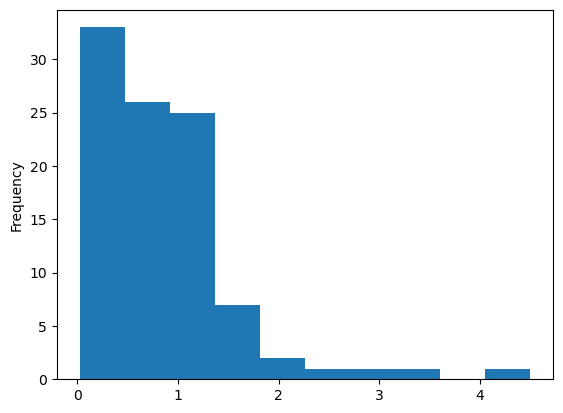

In [58]:
error_ratio.plot.hist()

So we can see that an error ratio tells us that within 0 to 0.5 means that we are within 50% of the actual medal count. But in some cases where the error ratio is 2 and above, it means our prediction were twice as high, which signifies that we are far of its true value

So the usability and the efficacy of this model is dependent on what exactly you want to use it for. It performs well for some countries compared to others in terms of error ratios

From our model we can see that countries that tend to get alot of medals do pretty well. 

In [59]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

and for countries that we dont have enough data for or countries that don't send enough atheletes to the olympics, or for countries that havent won lots of previous medals, our error is much higher. 

### Recommendations

- add in more predictors
- try different models
- could reshape the columns for a more linear correlation
- could train models that train models for countries with low medals won and high number of medals won